# Imports

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from textblob import TextBlob

In [12]:
data = pd.read_json('train.jsonl', lines=True)

print(data.head())

                                              prompt  \
0                                                 c#   
1                                                 c#   
2                                  bacillus subtilus   
3                                  bacillus subtilus   
4  Write long detailed essay about ancient type o...   

                                            response  helpfulness  \
0  C# is a high-level, object-oriented programmin...            3   
1  C# (pronounced "C sharp") is a modern, object-...            4   
2  Bacillus subtilis is a Gram-positive, rod-shap...            4   
3  The Bacillus subtilis is a Gram-positive, endo...            3   
4  Totemism is an ancient type of religion that i...            3   

   correctness  coherence  complexity  verbosity  
0            4          4           2          1  
1            4          4           2          3  
2            4          4           3          3  
3            4          3           3       

# Correlation analysis between all numeric fields

This will show how the scores move together (correlation strength and direction)

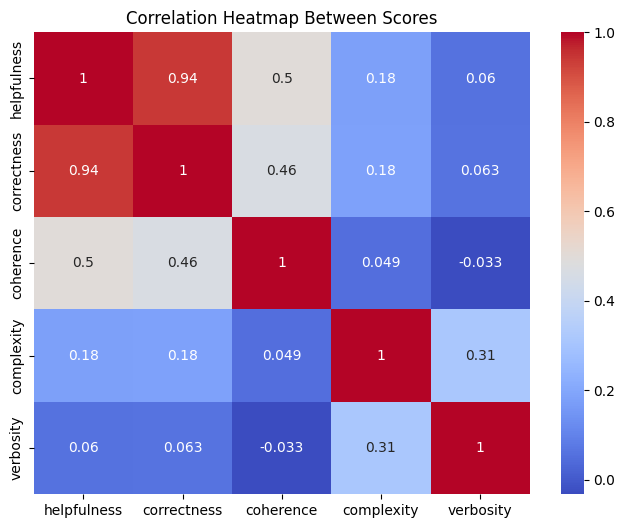

In [13]:
correlation_matrix = data[['helpfulness', 'correctness', 'coherence', 'complexity', 'verbosity']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Scores')
plt.show()

# Distribution analysis of each score

This will show how each score is distributed (e.g., skewed high, low or normal)

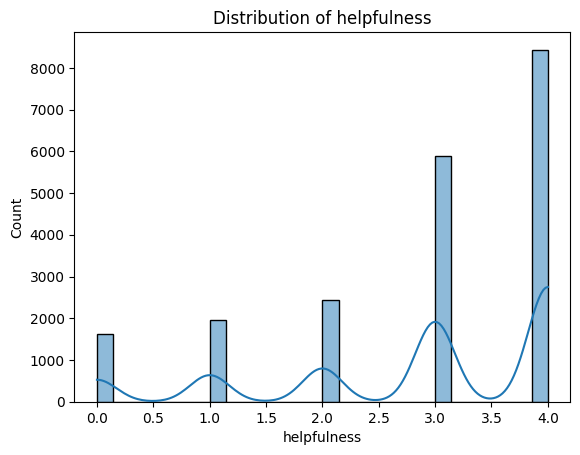

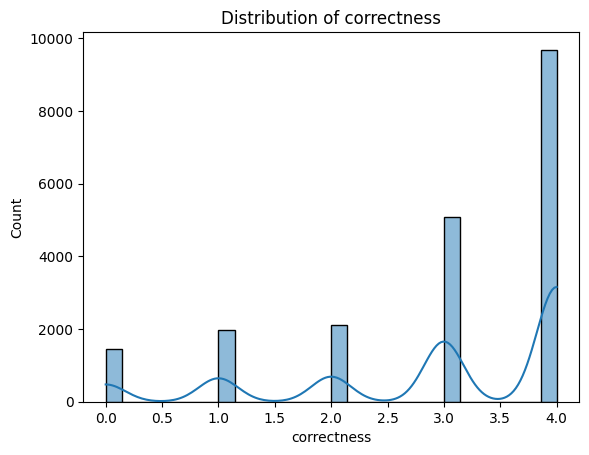

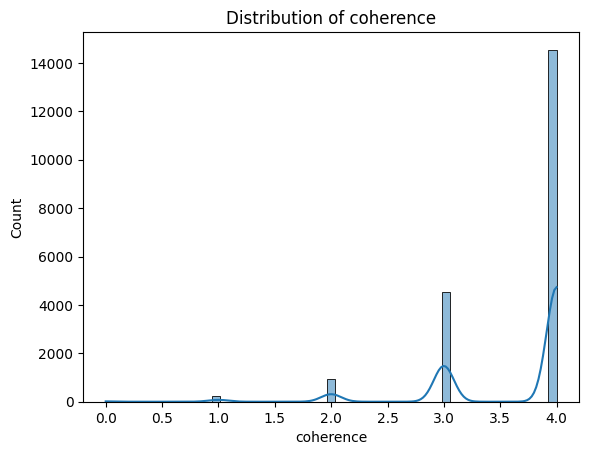

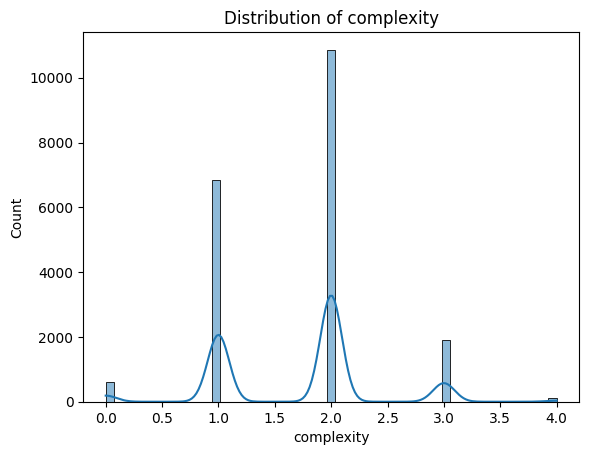

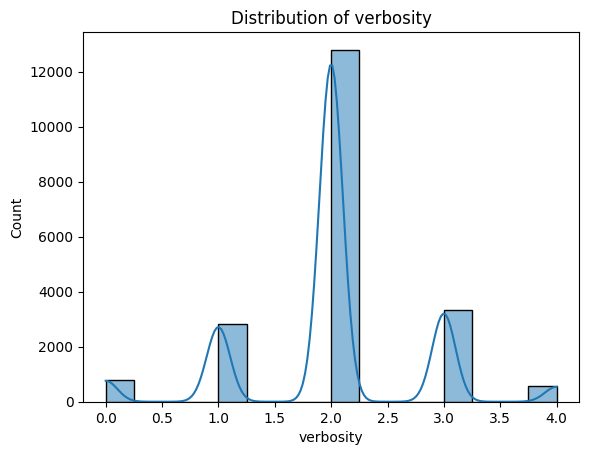

In [14]:
score_columns = ['helpfulness', 'correctness', 'coherence', 'complexity', 'verbosity']

for col in score_columns:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Scatter plots for relationships

Helpful to visually check trends

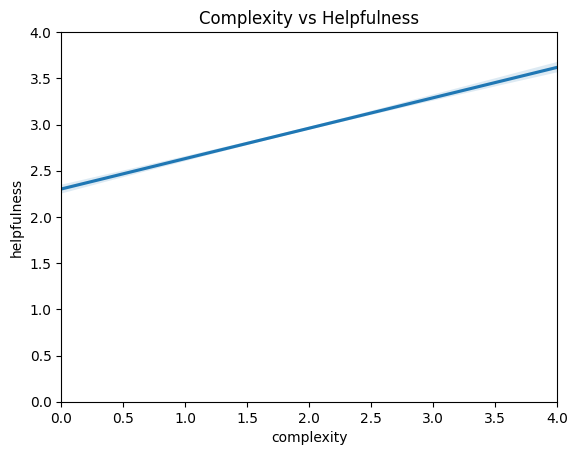

<Figure size 640x480 with 0 Axes>

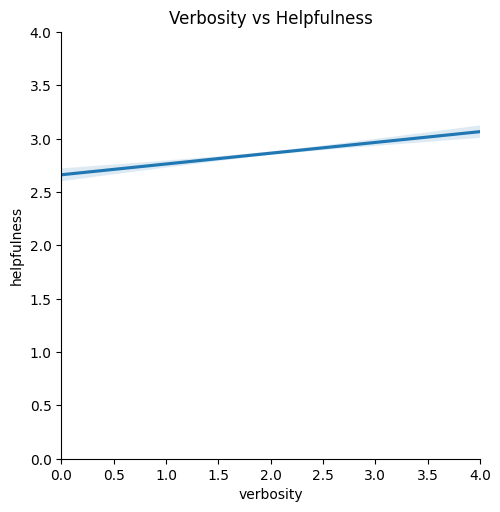

<Figure size 640x480 with 0 Axes>

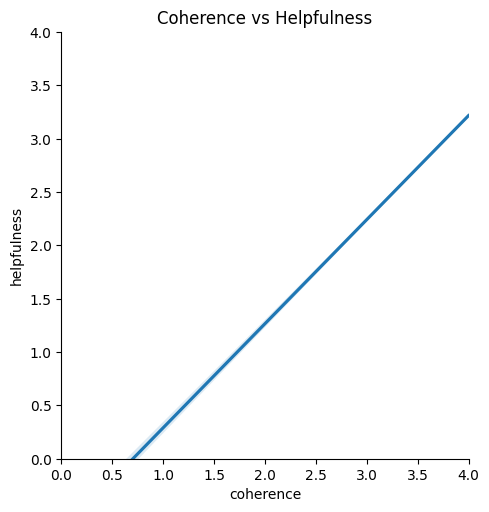

<Figure size 640x480 with 0 Axes>

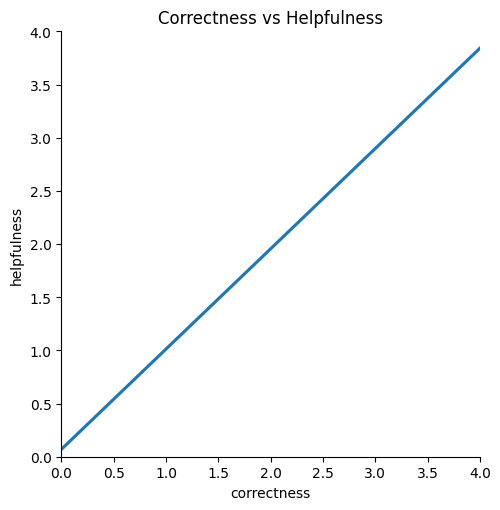

In [54]:
# Complexity vs Helpfulness
plt.figure()
sns.regplot(x='complexity', y='helpfulness', data=data, scatter=False)
plt.title('Complexity vs Helpfulness')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

# Verbosity vs Helpfulness
plt.figure()
sns.lmplot(x='verbosity', y='helpfulness', data=data, scatter=False)
plt.title('Verbosity vs Helpfulness')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

# Coherence vs Helpfulness
plt.figure()
sns.lmplot(x='coherence', y='helpfulness', data=data, scatter=False)
plt.title('Coherence vs Helpfulness')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

# Correctness vs Helpfulness
plt.figure()
sns.lmplot(x='correctness', y='helpfulness', data=data, scatter=False)
plt.title('Correctness vs Helpfulness')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

# Calculate Estimated Reading Time and analyze vs Helpfulness

Estimate reading time assuming 200 words per minute

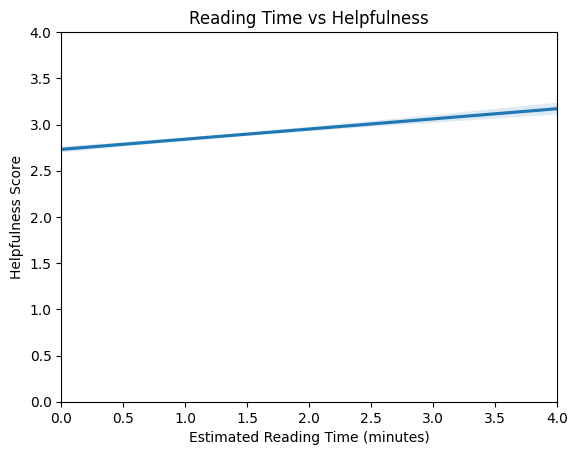

In [56]:
data['word_count'] = data['response'].apply(lambda x: len(x.split()))
data['reading_time_min'] = data['word_count'] / 200  # Assuming an average reading speed of 200 words per minute

plt.figure()
sns.regplot(x='reading_time_min', y='helpfulness', data=data, scatter=False)
plt.title('Reading Time vs Helpfulness')
plt.xlabel('Estimated Reading Time (minutes)')
plt.ylabel('Helpfulness Score')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

# Linear Regression: Predict Helpfulness

Test if helpfulness is objective (predictable from other scores)

Mean Squared Error of Linear Regression Model: 0.17


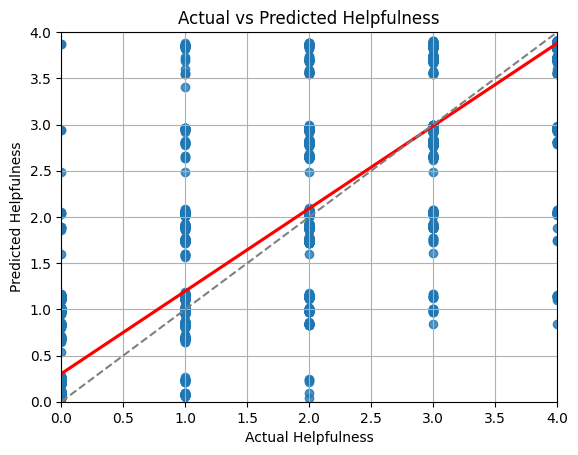

In [49]:
X = data[['correctness', 'coherence', 'complexity', 'verbosity']]
y = data['helpfulness']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error of Linear Regression Model: {mse:.2f}')

plt.figure()
sns.regplot(x=y, y=predictions, scatter=True, line_kws={"color": "red"})
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.plot([0, 4], [0, 4], linestyle='--', color='gray')
plt.grid()
plt.xlabel('Actual Helpfulness')
plt.ylabel('Predicted Helpfulness')
plt.title('Actual vs Predicted Helpfulness')
plt.show()

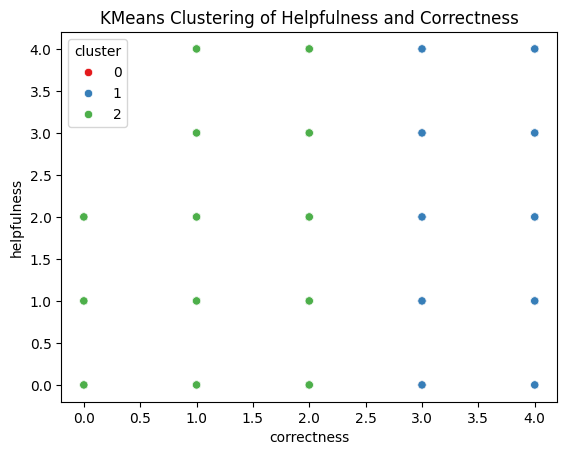

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['correctness', 'coherence', 'complexity', 'verbosity']])

sns.scatterplot(x='correctness', y='helpfulness', hue='cluster', data=data, palette='Set1')
plt.title('KMeans Clustering of Helpfulness and Correctness')
plt.show()

# Check polarity

Range -1 to 1.
-1: Very negative sentiment
0: Neutral sentiment
1: Very positive sentiment

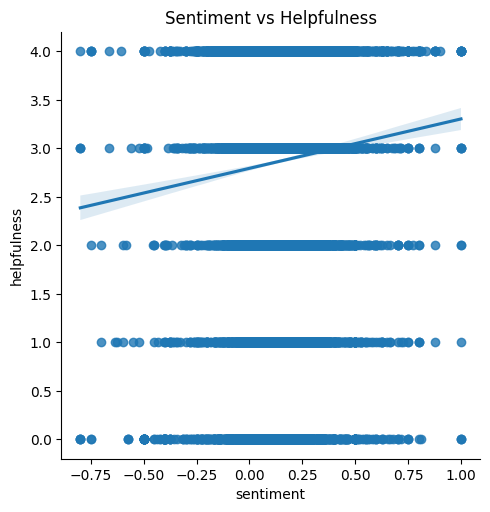

In [61]:
data['sentiment'] = data['response'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.lmplot(x='sentiment', y='helpfulness', data=data, logistic=False)
plt.title('Sentiment vs Helpfulness')
plt.show()

Average Correctness in Low Helpfulness Responses: 1.3196407783136537
Average Correctness in High Helpfulness Responses: 3.9793692198245196
Average Coherence in Low Helpfulness Responses: 3.19906868451688
Average Coherence in High Helpfulness Responses: 3.978657813611572
Average Complexity in Low Helpfulness Responses: 1.5235323465824049
Average Complexity in High Helpfulness Responses: 1.7689115484941902
Average Verbosity in Low Helpfulness Responses: 1.9514385498087476
Average Verbosity in High Helpfulness Responses: 2.0060469528100544


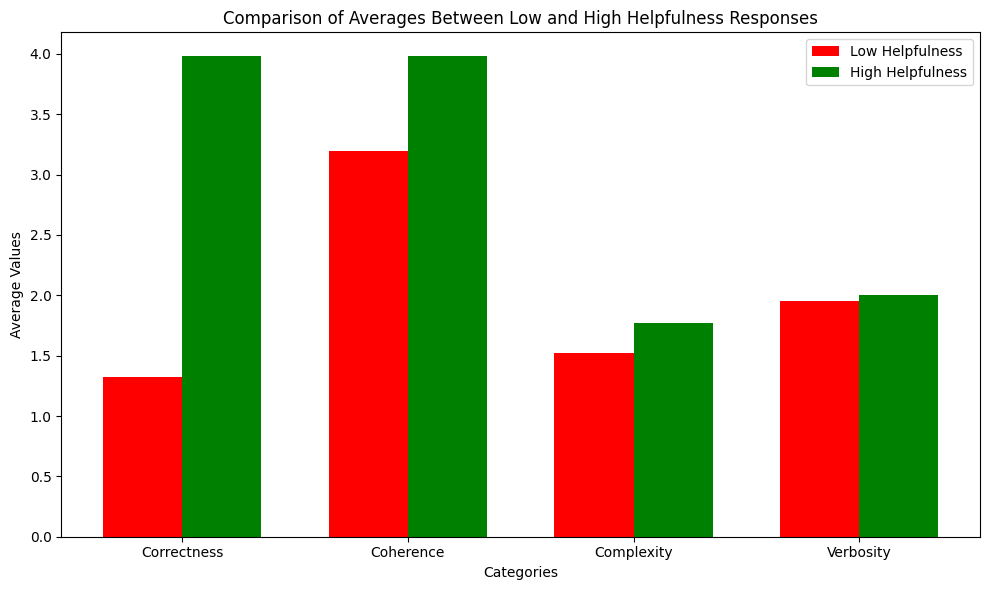

In [65]:
low_helpful = data[data['helpfulness'] <= 2]
high_helpful = data[data['helpfulness'] >= 4]

# Create a dictionary with the average values
low_helpful_means = [
    low_helpful['correctness'].mean(),
    low_helpful['coherence'].mean(),
    low_helpful['complexity'].mean(),
    low_helpful['verbosity'].mean()
]

high_helpful_means = [
    high_helpful['correctness'].mean(),
    high_helpful['coherence'].mean(),
    high_helpful['complexity'].mean(),
    high_helpful['verbosity'].mean()
]

# Labels for the categories
labels = ['Correctness', 'Coherence', 'Complexity', 'Verbosity']

# Set up the positions of the bars
x = range(len(labels))

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for low_helpful and high_helpful
bar_width = 0.35
ax.bar(x, low_helpful_means, bar_width, label='Low Helpfulness', color='red')
ax.bar([i + bar_width for i in x], high_helpful_means, bar_width, label='High Helpfulness', color='green')

# Labeling
ax.set_xlabel('Categories')
ax.set_ylabel('Average Values')
ax.set_title('Comparison of Averages Between Low and High Helpfulness Responses')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

print("Average Correctness in Low Helpfulness Responses:", low_helpful['correctness'].mean())
print("Average Correctness in High Helpfulness Responses:", high_helpful['correctness'].mean())
print("Average Coherence in Low Helpfulness Responses:", low_helpful['coherence'].mean())
print("Average Coherence in High Helpfulness Responses:", high_helpful['coherence'].mean())
print("Average Complexity in Low Helpfulness Responses:", low_helpful['complexity'].mean())
print("Average Complexity in High Helpfulness Responses:", high_helpful['complexity'].mean())
print("Average Verbosity in Low Helpfulness Responses:", low_helpful['verbosity'].mean())
print("Average Verbosity in High Helpfulness Responses:", high_helpful['verbosity'].mean())

# Show plot
plt.tight_layout()
plt.show()
